# Problem Statement


Our client is an insurance company that has provided health insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interesred in vehicle insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee compensation for a specified loss, damage, illness or death in return for the payment of specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay premium of 5000 earch year for a health insurance cover of rs. 2 lacs so that if God forbid you fell ill and need to be hospitalized that year the insurance provider company will bear the cost of hospitalization etc. for upto rs 2 lacs. Now if you are thinking how a company bear such high hospitalization cost when it charges a premium of upto 5000 , that is where the concept of probability comes into picture. For example like you there may be 100 customers who would be paying a premium of 5000 every year but only a few of them (say 2-3) would get hospitalized that year not everyone. This way everyone shares risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by vehicle, the insurannce company provider will provide a componsation called sum assured to the customer.

# Business Goal

Building a model to predict whether a customer would be interested in vehicle insurance will be extremely useful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimize its business model and revenue.


Now, in order to predict , whether the customer would be intrested in vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, damage), Policy (Premium, Sourcing channel) etc.

# What this notebook will cover ?

### 1. Exploratory data analysis
### 2. Modelling and Evaluation




### Importing Libraries

In [1]:
!pip install xgboost

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split, StratifiedKFold, KFold, GridSearchCV
import xgboost as xgb
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report

#### Reading dataset

In [3]:
train = pd.read_csv('C:\\Users\\bkumarsingh\\OneDrive - E2open, LLC\\Attachments\\AI\\Projects\\Kaggle\\Vehicle Insurance\\train.csv')

In [4]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
df = train.copy()

In [6]:
df.shape

(381109, 12)

#### Checking NULL Values

In [7]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [8]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Number of columns and number of unique values present in it

In [10]:
print('colums and number of unique values')

dict = []

for i in df.columns:
    print(f'{i} --> {df[i].nunique()}')

colums and number of unique values
id --> 381109
Gender --> 2
Age --> 66
Driving_License --> 2
Region_Code --> 53
Previously_Insured --> 2
Vehicle_Age --> 3
Vehicle_Damage --> 2
Annual_Premium --> 48838
Policy_Sales_Channel --> 155
Vintage --> 290
Response --> 2


#### Separating the categorical data

In [11]:
categorical_columns = df.select_dtypes(include=['object']).columns

In [12]:
categorical_columns

Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')

## Exploratory Data Analysis

#### Count of gender with respect to target value

#### Response for male slightly greater than female



<AxesSubplot:xlabel='Gender', ylabel='count'>

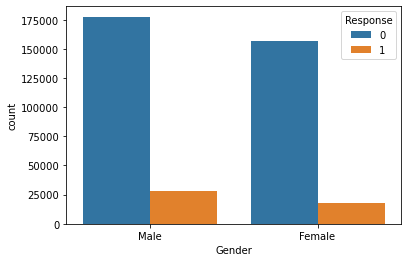

In [13]:
sns.countplot(data=df, x='Gender', hue='Response')

### Count of gender with respect to previously insured

### Response for male and female are same

<AxesSubplot:xlabel='Gender', ylabel='count'>

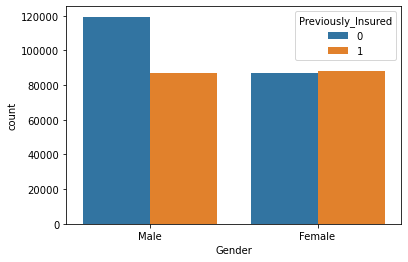

In [14]:
sns.countplot(data=df, x='Gender', hue='Previously_Insured')

### Age vs Previously Insured



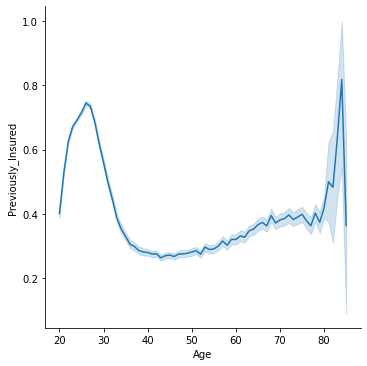

In [15]:
sns.relplot(data=df, x='Age', y='Previously_Insured', kind='line')

### Vehicle AGE vs Vehicle Damage

<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

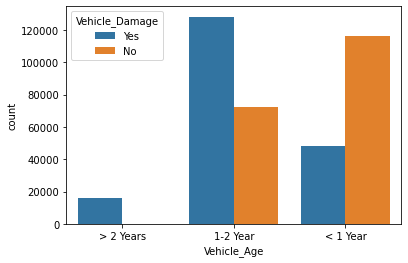

In [16]:
sns.countplot(data=df, x='Vehicle_Age', hue='Vehicle_Damage')

### Age distribution



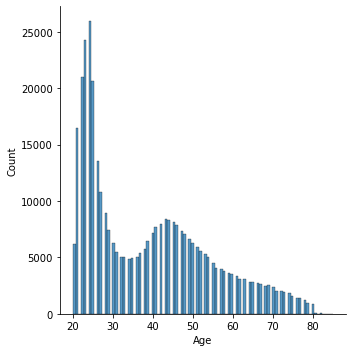

In [17]:
sns.displot(df.Age)

### Gender vs Driving License

In [18]:
df = train.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()

In [19]:
df

,Gender,Driving_License
0,Female,175020
1,Male,206089


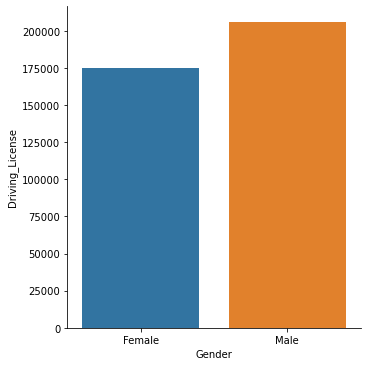

In [20]:
sns.catplot(x='Gender', y='Driving_License', data=df, kind='bar')

### Count of Vehicle Age vs Response

In [21]:
df = train.groupby(['Vehicle_Age', 'Response'])['id'].count().to_frame().rename(columns={'id':'Count'}).reset_index()

In [22]:
df.head()

,Vehicle_Age,Response,Count
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305


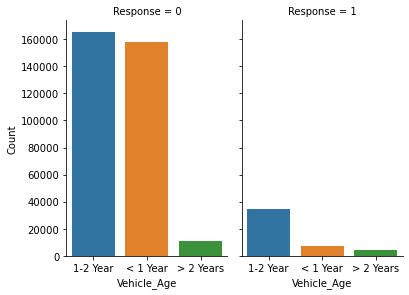

In [23]:
g = sns.catplot(x='Vehicle_Age', y='Count', col='Response', data=df, kind='bar', height=4, aspect=.7)

### Count of Vehicle Damage vs Response

In [24]:
df = train.groupby(['Vehicle_Damage', 'Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()

In [25]:
df

,Vehicle_Damage,Response,count
0,No,0,187714
1,No,1,982
2,Yes,0,146685
3,Yes,1,45728


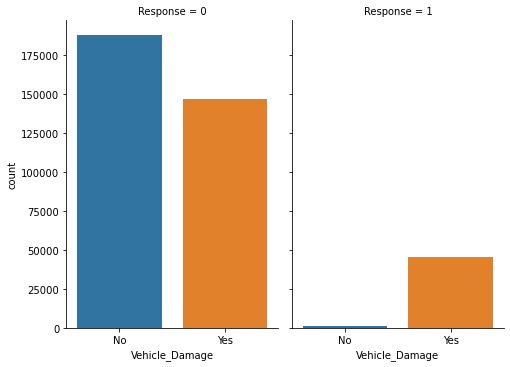

In [26]:
g = sns.catplot(x="Vehicle_Damage", y="count", col="Response", data=df, kind='bar', aspect=0.7)

C:\Users\bkumarsingh\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual_Premium', ylabel='Density'>

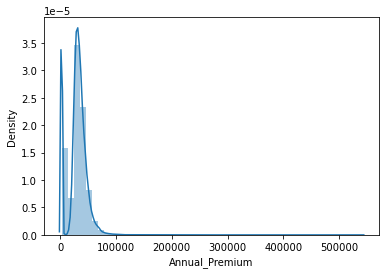

In [27]:
sns.distplot(train['Annual_Premium'])

### Vintage

C:\Users\bkumarsingh\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Vintage', ylabel='Density'>

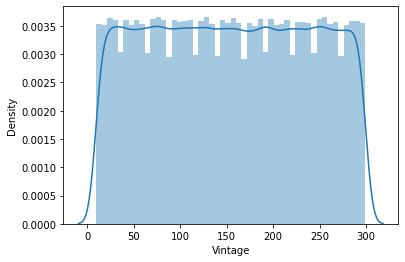

In [28]:
sns.distplot(train.Vintage)

### Data preprocessing

#### Categorical Data into Numeric Data

In [29]:
train.Gender = train.Gender.replace({'Male':1, 'Female':0})

In [30]:
train.Gender.unique()

array([1, 0], dtype=int64)

In [31]:
train.Vehicle_Age.unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [32]:
train.Vehicle_Damage.replace({'Yes':1, 'No':0}, inplace=True)

In [33]:
train.Vehicle_Damage.unique()

array([1, 0], dtype=int64)

In [34]:
train.Vehicle_Age.unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [35]:
train.Vehicle_Age.replace({'< 1 Year':1, '1-2 Year':2, '> 2 Years':3}, inplace=True)

In [36]:
train.Vehicle_Age.unique()

array([3, 2, 1], dtype=int64)

#### Hence data is preprocessed we can perform some operations

<AxesSubplot:>

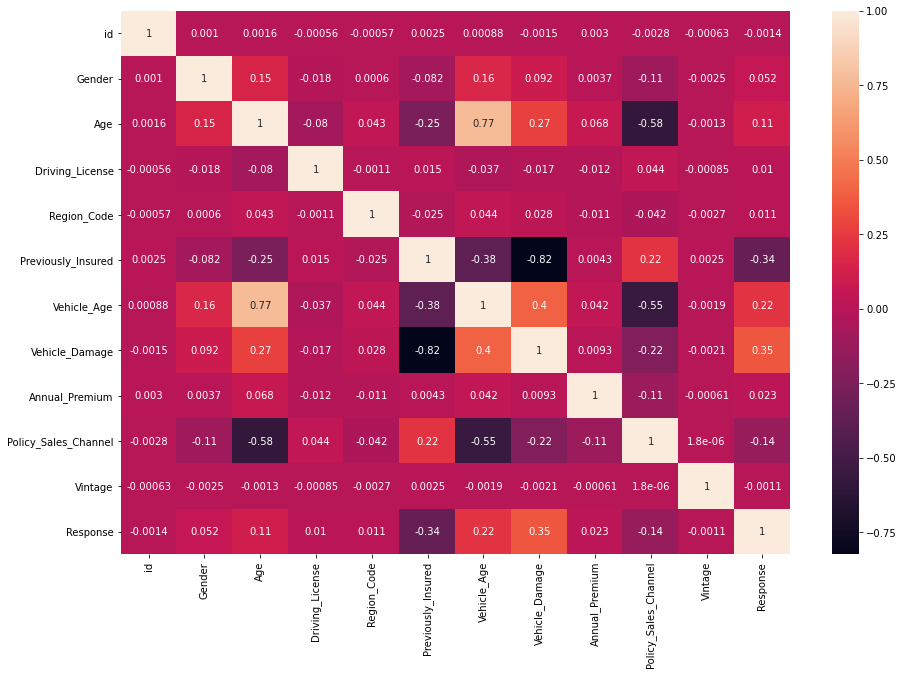

In [37]:
plt.figure(figsize=(15,10))

sns.heatmap(train.corr(), annot=True)

#### Highly correlated columns wrt can give us better accuracy

In [38]:
high_corr = train.corr()



In [40]:
high_corr_features = high_corr.index[abs(high_corr['Response']) > 0.2]

In [41]:
high_corr_features

Index(['Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Response'], dtype='object')

#### Separating Dependent and Independent Data

In [42]:
X = train.drop(['Response'], axis=1)

print(X.shape)

y = train['Response']

print(y.shape)

(381109, 11)
(381109,)


#### Separating train data into train and test (on 20% of training dataset)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(304887, 11)
(76222, 11)


# Modelling

### We are going to use RandomForestClassifier and XGboost

In [44]:
model = RandomForestClassifier()

model.fit(X_train, y_train)



RandomForestClassifier()

In [45]:
y_pred = model.predict(X_test)



In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93     66846
           1       0.41      0.08      0.13      9376

    accuracy                           0.87     76222
   macro avg       0.65      0.53      0.53     76222
weighted avg       0.83      0.87      0.83     76222



In [48]:
print(confusion_matrix(y_test, y_pred))

[[65798  1048]
 [ 8634   742]]


In [49]:
print('Training Score:\n', model.score(X_test, y_test)*100)

Training Score:
 87.29763060533703


In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [51]:
print('Mean squared error:\n', mean_squared_error(y_test, y_pred))

Mean squared error:
 0.12702369394662957


In [53]:
print('R2 Score:\n', r2_score(y_test, y_pred))

R2 Score:
 -0.17747689815080014


In [55]:
print(model.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [56]:
accuracy_score(y_test,y_pred)

0.8729763060533704

In [57]:
y_score  = model.predict_proba(X_test)[:,1]



In [58]:
y_score

array([0.  , 0.35, 0.18, ..., 0.  , 0.08, 0.  ])

In [59]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
fpr, tpr, _ = roc_curve(y_test, y_score)

In [61]:
fpr

array([0.00000000e+00, 2.99195165e-05, 4.48792748e-05, 4.48792748e-05,
       7.47987913e-05, 8.97585495e-05, 1.04718308e-04, 1.34637824e-04,
       1.64557341e-04, 1.94476857e-04, 2.39356132e-04, 2.99195165e-04,
       4.18873231e-04, 4.78712264e-04, 6.28309847e-04, 6.58229363e-04,
       7.77907429e-04, 9.42464770e-04, 1.19678066e-03, 1.42117703e-03,
       1.79517099e-03, 2.22900398e-03, 2.63291745e-03, 3.23130778e-03,
       3.66514077e-03, 4.21865183e-03, 4.77216288e-03, 5.65478862e-03,
       6.77677049e-03, 7.67435598e-03, 8.81129761e-03, 1.04867905e-02,
       1.20126859e-02, 1.37480178e-02, 1.56778266e-02, 1.82658648e-02,
       2.10932591e-02, 2.39655327e-02, 2.71818807e-02, 3.10414984e-02,
       3.53499087e-02, 4.00173533e-02, 4.47895162e-02, 4.97112767e-02,
       5.50219908e-02, 6.11554917e-02, 6.76031475e-02, 7.45743949e-02,
       8.17101996e-02, 8.86964067e-02, 9.69541932e-02, 1.04927744e-01,
       1.13529605e-01, 1.22131466e-01, 1.31301798e-01, 1.40756365e-01,
      

In [62]:
tpr

array([0.00000000e+00, 1.06655290e-04, 1.06655290e-04, 2.13310580e-04,
       2.13310580e-04, 3.19965870e-04, 3.19965870e-04, 3.19965870e-04,
       4.26621160e-04, 7.46587031e-04, 9.59897611e-04, 1.27986348e-03,
       1.59982935e-03, 1.91979522e-03, 3.19965870e-03, 3.51962457e-03,
       4.26621160e-03, 4.90614334e-03, 5.43941980e-03, 6.71928328e-03,
       8.63907850e-03, 9.81228669e-03, 1.16254266e-02, 1.39718430e-02,
       1.75981229e-02, 2.01578498e-02, 2.31441980e-02, 2.69837884e-02,
       3.33831058e-02, 3.89291809e-02, 4.44752560e-02, 5.03412969e-02,
       5.84470990e-02, 6.84726962e-02, 7.91382253e-02, 8.91638225e-02,
       1.01215870e-01, 1.12308020e-01, 1.24466724e-01, 1.37585324e-01,
       1.52303754e-01, 1.69155290e-01, 1.87606655e-01, 2.07337884e-01,
       2.26535836e-01, 2.49893345e-01, 2.73890785e-01, 2.96288396e-01,
       3.18899317e-01, 3.46096416e-01, 3.71800341e-01, 3.98570819e-01,
       4.28540956e-01, 4.55204778e-01, 4.82721843e-01, 5.12478669e-01,
      

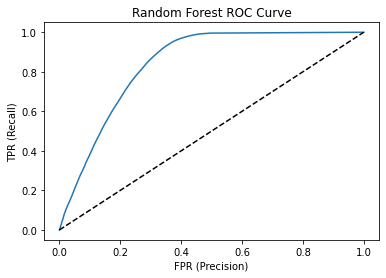

Area under curve : 0.8411876388053678


In [63]:
plt.title('Random Forest ROC Curve')

plt.xlabel('FPR (Precision)')

plt.ylabel('TPR (Recall)')

plt.plot(fpr, tpr)

plt.plot((0,1), ls='dashed', color='black')

plt.show()

print('Area under curve :', auc(fpr, tpr))

#### Random Forest AUC is 84.20

# XGBoost

In [64]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier()

model_xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_test)

C:\Users\bkumarsingh\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:24:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66846
           1       0.45      0.02      0.04      9376

    accuracy                           0.88     76222
   macro avg       0.66      0.51      0.49     76222
weighted avg       0.83      0.88      0.82     76222



In [67]:
confusion_matrix(y_test, y_pred)

array([[66582,   264],
       [ 9160,   216]], dtype=int64)

In [68]:
print('Training Score:', model_xgb.score(X_test, y_test)*100)

Training Score: 87.6361155571882


In [69]:
print('Mean Sqaured Error:\n', mean_squared_error(y_test, y_pred))

Mean Sqaured Error:
 0.12363884442811787


In [70]:
r2_score(y_test, y_pred)

-0.14610021567580467

In [71]:
model_xgb.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 8,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [72]:
accuracy_score(y_test, y_pred)

0.8763611555718821

#### XGBoost classifier accuracy is 88

In [73]:
y_score = model_xgb.predict_proba(X_test)[:,1]

In [74]:
fpr, tpr, _ = roc_curve(y_test, y_score)

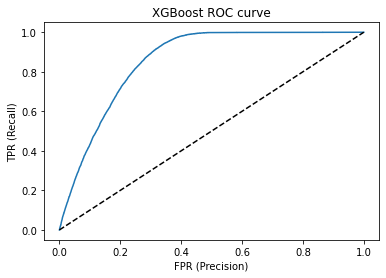

Area under curve:  0.8563906271523799


In [75]:
plt.title('XGBoost ROC curve')

plt.xlabel('FPR (Precision)')

plt.ylabel('TPR (Recall)')

plt.plot(fpr, tpr)

plt.plot((0,1), ls='dashed', color='black')

plt.show()

print('Area under curve: ', auc(fpr, tpr))

#### XGB Area under curve 85.63